<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/Single_Linear_Regression_(delivery_time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data Set

In [1]:
import pandas as pd
from google.colab import files 
files=files.upload()


Saving delivery_time.csv to delivery_time.csv


In [21]:
data = pd.read_csv("delivery_time.csv")
data

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_time  21 non-null     float64
 1   Sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Correlation

In [5]:
data.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


In [13]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler= MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(data)

In [48]:
data1 = pd.DataFrame(rescaledX,columns=['DeliveryTime','SortingTime'])
data1


,DeliveryTime,SortingTime
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000
5,0.350000,0.500
6,0.523810,0.625
7,0.071429,0.125
8,0.471429,1.000
9,0.511905,0.875


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


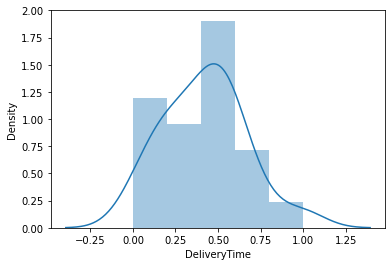

In [49]:
import seaborn as sns
sns.distplot(data1['DeliveryTime'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


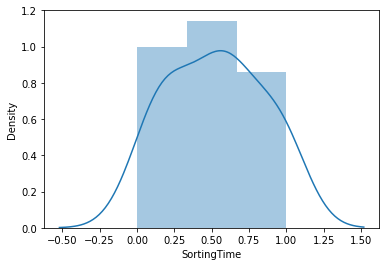

In [50]:
import seaborn as sns
sns.distplot(data1['SortingTime'])

Fitting a Linear Regression Model

In [51]:
import statsmodels.formula.api as smf
import pandas.util.testing as tm
model = smf.ols("DeliveryTime~SortingTime",data = data1).fit()

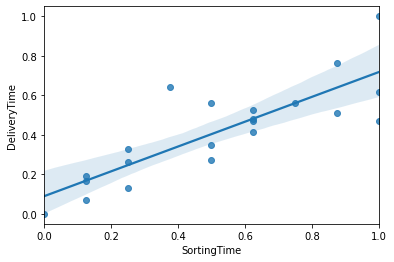

In [52]:
sns.regplot(x="SortingTime", y="DeliveryTime", data=data1);

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           3.98e-06
Time:                        06:26:35   Log-Likelihood:                 12.578
No. Observations:                  21   AIC:                            -21.16
Df Residuals:                      19   BIC:                            -19.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0896      0.060      1.496      0.151      -0.036       0.215
SortingTime     0.6282      0.098      6.387      0.000       0.422       0.834
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         4.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler

In [56]:
scaler= StandardScaler()
rescaled=scaler.fit_transform(data)
data2 = pd.DataFrame(rescaled,columns=['DeliveryTime','SortingTime'])
data2


,DeliveryTime,SortingTime
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625
5,-0.290949,-0.076781
6,0.446038,0.326320
7,-1.472148,-1.286086
8,0.223933,1.535625
9,0.395560,1.132523


In [65]:
import statsmodels.formula.api as smf
import numpy as np
import pandas.util.testing as tm
model1 = smf.ols("DeliveryTime~SortingTime",data = data2).fit()

In [66]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           3.98e-06
Time:                        06:40:31   Log-Likelihood:                -17.759
No. Observations:                  21   AIC:                             39.52
Df Residuals:                      19   BIC:                             41.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.065e-16      0.129  -3.92e-15      1.000      -0.271       0.271
SortingTime     0.8260      0.129      6.387      0.000       0.555       1.097
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


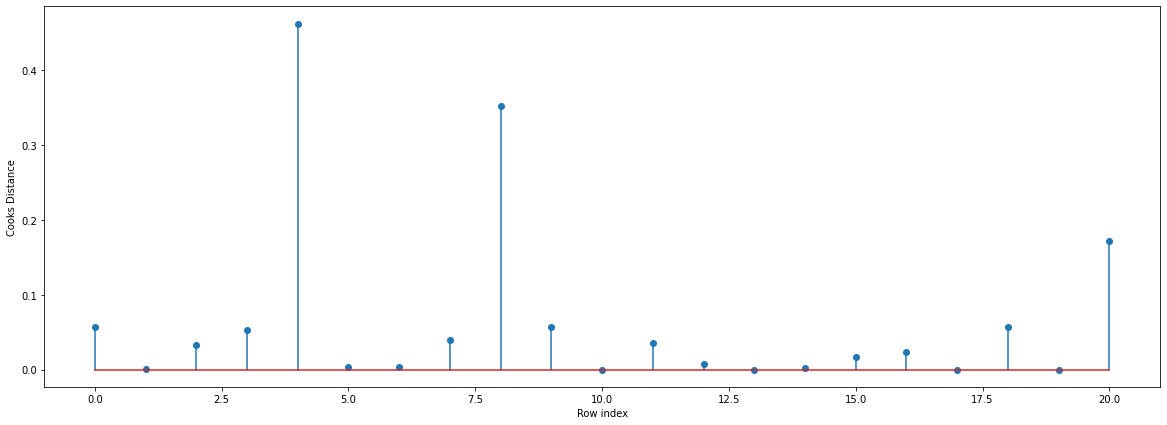

In [76]:
#Plot the influencers values using stem plot
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [77]:
#index and value of influencer where c is more than .4
(np.argmax(c),np.max(c))

(4, 0.46205304126503205)

In [94]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data2=data.drop(data.index[[4,8,20]],axis=0).reset_index()

In [95]:
#Drop the original index
data2=data2.drop(['index'],axis=1)

In [96]:
data2

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,15.35,6
5,19.00,7
6,9.50,3
7,18.75,9
8,19.83,8
9,10.75,4


In [97]:
import statsmodels.formula.api as smf
import numpy as np
import pandas.util.testing as tm
model2 = smf.ols("Delivery_time~Sorting_time",data = data2).fit()

In [98]:
model2.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     79.94
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           1.27e-07
Time:                        07:13:19   Log-Likelihood:                -35.450
No. Observations:                  18   AIC:                             74.90
Df Residuals:                      16   BIC:                             76.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.0240      1.175      5.126      0.000       3.533       8.515
Sorting_time     1.6741      0.187      8.941      0.000       1.277       2.071
==============================================================================
Omnibus:                        1.044   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.959
Skew:                           0.447   Prob(JB):                        0.619
Kurtosis:                       2.307   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Delivery Time = 6.02 + 1.67(Sorting Time)**

# Predict for new data point

In [99]:
#Predict for 15min and 20min Sorting Time
newdata=pd.Series([15,20])

In [102]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_time'])

In [104]:
model2.predict(data_pred)

0    31.135141
1    39.505521
dtype: float64